<a href="https://colab.research.google.com/github/ikram-data/Violet-WD-Hackathon/blob/GL/Constructing_index_workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.tools 
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('max_colwidth',99999)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA 

In [4]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

     |████████████████████████████████| 41 kB 249 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=f2df98ce9800896e03c3b0aacb6d8b8f79fa614d28fa56ffceb70e8c65ea653b
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [5]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


In [348]:
new_df=pd.read_csv('index_df (1).csv')

# Data prep


In [311]:
full=new_df[['Country Name', 'Country Code', 'Continent', 'Year', 'gdp_g',
       'gdp_pc_g',
       'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       'pol_gen', 'exl_gen', 'exl_eco', 'exl_geo', 'exl_pol', 'exl_soc',
       'labour_share',
       'suffrage_f', 'domestic_movement', 'slave', 'suffrage', 'v2xeg_eqaccess']].dropna(axis = 0, how = 'any')

In [312]:
features_df=new_df[[ 'gdp_g',
       'gdp_pc_g',
       'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       'pol_gen', 'exl_gen', 'exl_eco', 'exl_geo', 'exl_pol', 'exl_soc',
       'labour_share',
       'suffrage_f', 'domestic_movement', 'slave', 'suffrage', 'v2xeg_eqaccess']].dropna(axis = 0, how = 'any')

In [353]:
#standardise variables
scaler = StandardScaler()

scaled_df=features_df.copy()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df))
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.218264,-0.668485,-0.487855,-0.292554,-1.741134,-1.482757,-1.859317,-2.312332,-1.693680,-2.158850,-4.520442,0.223916,-3.597221,-1.036018,0.223920,-1.624841
1,0.742537,1.299324,0.505510,-1.198619,-0.470131,0.142318,0.237969,0.813269,-0.068167,0.440036,1.010963,0.223916,0.294096,-0.444866,0.223920,0.142130
2,1.705126,0.620784,-2.510063,-1.652942,-3.213484,-1.251252,-0.190129,0.037834,-1.039694,-1.607449,0.929592,-4.693894,-2.735613,-2.970698,-4.696914,-2.250934
3,-1.166290,-1.068674,-0.345946,0.676126,0.630985,1.013866,0.379359,0.705901,1.115056,0.975220,0.132005,0.223916,0.879765,0.495603,0.223920,0.986196
4,0.483546,1.034408,-0.700719,-1.384163,-0.413502,-0.166356,-0.296171,0.276429,0.026340,1.076580,0.483154,0.223916,0.829082,0.586963,0.223920,-0.664833


In [192]:
features_new.shape

(2544, 16)

#FA

In [130]:
#Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_df)
chi_square_value, p_value
#The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix. (67892.67658974323, 0.0)

(67892.67658970803, 0.0)

In [140]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scaled_df)
kmo_model
#Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. 0.8224475718892983


/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.8224475718892358

In [351]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(scaled_df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([ 1.01540726e+01,  3.03957216e+00,  1.88581742e+00,  1.36314951e+00,
        1.04823391e+00,  7.88062065e-01,  3.90595019e-01,  3.50754224e-01,
        3.00858455e-01,  2.45266742e-01,  1.57877376e-01,  1.18254930e-01,
        6.39279738e-02,  5.09884114e-02,  4.25652428e-02,  4.00356803e-06,
        2.78944024e-16, -8.61722996e-18, -1.71711389e-16, -5.63700789e-16])

##Select number of factors

Standard practice is to choose factors that: 

*    (i) have associated eigenvalues larger than one; 
*   (ii) contribute individually to the explanation of overall variance by more than 10%; and 


*   (iii) contribute
cumulatively to the explanation of the overall variance by more than 60%. 
Source: https://www.oecd.org/sdd/42495745.pdf

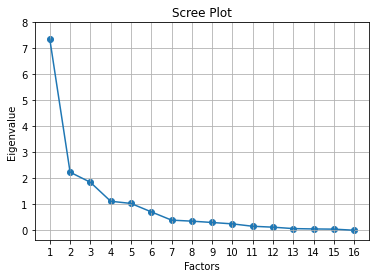

In [230]:
# Create scree plot using matplotlib to look at eigenvalues
plt.scatter(range(1,scaled_df.shape[1]+1),ev)
plt.plot(range(1,scaled_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.yticks(np.arange(min(ev), max(ev)+1, 1.0))
plt.xticks(np.arange(1, scaled_df.shape[1]+1, 1.0))
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [232]:
df_variance=pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']) #look at variance expained by factors individually and cumulatively 

In [235]:
df_variance

,0,1,2,3,4,5
Variance,7.190159,2.179097,1.788924,0.992386,0.552096,0.192293
Proportional Var,0.449385,0.136194,0.111808,0.062024,0.034506,0.012018
Cumulative Var,0.449385,0.585579,0.697386,0.759410,0.793916,0.805935




*  (i) have associated eigenvalues larger than one **Factor 1-3 have eigenvalue higher than one(from screeplot)**
*  (ii) contribute individually to the explanation of overall variance by more than 10%; **Factor 4 explains less than 10% so it can be discarded**
*  (iii) contribute cumulatively to the explanation of the overall variance by more than 60% **Factor 1-3 together explain 69.7% of the variance**

Therefore, we choose n_factors= 3






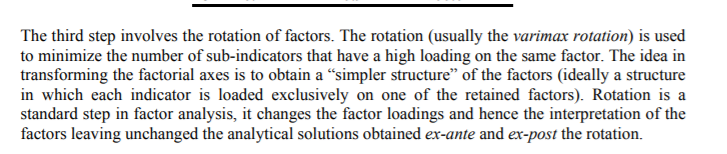

In [355]:
facs = ['Factors' + ' ' + str(i + 1) for i in range(3)]
fa = FactorAnalyzer(n_factors=3,rotation='varimax') #select n_factors=3 and perform varimax rotation
fa.fit(scaled_df)
load=pd.DataFrame(fa.loadings_,index=features_df.columns,columns=facs)

In [317]:
#calculate the variance explained for each factor
load.sum(axis=0).to_dict()

{'Factors 1': 6.344332962918301,
 'Factors 2': 5.582519900807735,
 'Factors 3': 3.302643039920237}

In [356]:
load

,Factors 1,Factors 2,Factors 3
gdp_g,-0.146646,-0.072142,0.984198
gdp_pc_g,0.034789,0.092137,0.938440
Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,0.524202,0.492265,-0.064162
Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,0.256968,0.317171,-0.074404
pol_gen,0.678310,0.636406,-0.041625
exl_gen,0.871656,0.305204,-0.007862
exl_eco,0.933364,0.021871,-0.027178
exl_geo,0.885448,-0.013654,-0.035183
exl_pol,0.816199,0.137165,-0.061709
exl_soc,0.898142,0.233923,-0.030714


recreating this table:

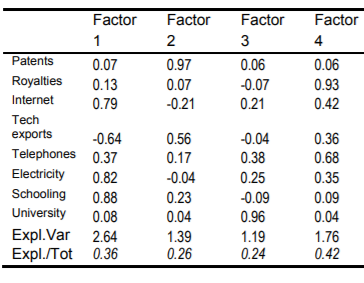

In [318]:
#calculate total variance explained 
load.sum(axis=0).to_frame().sum() 

0    15.229496
dtype: float64

In [319]:
#append row to the dataframe
new_row={'Factors 1': 6.344332962918301,
 'Factors 2': 5.582519900807735,
 'Factors 3': 3.302643039920237}

load = load.append(new_row, ignore_index=True)
load

,Factors 1,Factors 2,Factors 3
0,-0.126267,-0.105933,-0.024369
1,0.023434,0.058515,0.065790
2,0.356806,0.547797,0.190677
3,0.094916,0.262424,0.063243
4,0.429704,0.815248,0.217086
5,0.764270,0.470652,0.108896
6,0.924697,0.220874,-0.020792
7,0.936376,0.167122,-0.028860
8,0.792748,0.275005,0.071303
9,0.874908,0.329304,0.145125


In [320]:
#calculate the proportion of the explained variance by each factor
#variance explained by each factor divided by total variance explained
new_row={'Factors 1': 6.344332962918301/15.229496,
 'Factors 2': 5.582519900807735/15.229496,
 'Factors 3': 3.302643039920237/15.229496}

#append row to the dataframe
load = load.append(new_row, ignore_index=True)
load

,Factors 1,Factors 2,Factors 3
0,-0.126267,-0.105933,-0.024369
1,0.023434,0.058515,0.065790
2,0.356806,0.547797,0.190677
3,0.094916,0.262424,0.063243
4,0.429704,0.815248,0.217086
5,0.764270,0.470652,0.108896
6,0.924697,0.220874,-0.020792
7,0.936376,0.167122,-0.028860
8,0.792748,0.275005,0.071303
9,0.874908,0.329304,0.145125


In [321]:
cols=['gdp_g', 'gdp_pc_g',
       'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       'pol_gen', 'exl_gen', 'exl_eco', 'exl_geo', 'exl_pol', 'exl_soc',
       'labour_share', 'suffrage_f', 'domestic_movement', 'slave', 'suffrage',
       'v2xeg_eqaccess','var_explained','prop_var_explained']
load['cols']=cols
load.set_index('cols',inplace=True)

In [322]:
load 

,Factors 1,Factors 2,Factors 3
cols,,,
gdp_g,-0.126267,-0.105933,-0.024369
gdp_pc_g,0.023434,0.058515,0.065790
Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,0.356806,0.547797,0.190677
Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,0.094916,0.262424,0.063243
pol_gen,0.429704,0.815248,0.217086
exl_gen,0.764270,0.470652,0.108896
exl_eco,0.924697,0.220874,-0.020792
exl_geo,0.936376,0.167122,-0.028860
exl_pol,0.792748,0.275005,0.071303


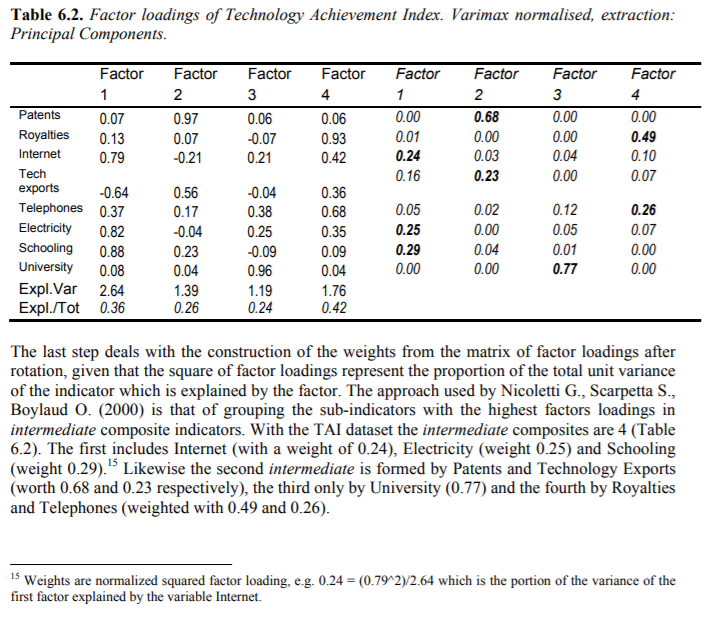

In [323]:
#compute the weights using the method stated in the footnote
vari_max=load.copy()
var_explained=vari_max[16:17]
vari_max=vari_max[:16]
vari_max['Factors 1']=vari_max['Factors 1']**2/var_explained['Factors 1'][0]
vari_max['Factors 2']=vari_max['Factors 2']**2/var_explained['Factors 2'][0]
vari_max['Factors 3']=vari_max['Factors 3']**2/var_explained['Factors 3'][0]

In [324]:
vari_max

,Factors 1,Factors 2,Factors 3
cols,,,
gdp_g,0.002513,0.002010,0.000180
gdp_pc_g,0.000087,0.000613,0.001311
Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,0.020067,0.053754,0.011009
Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,0.001420,0.012336,0.001211
pol_gen,0.029104,0.119055,0.014269
exl_gen,0.092068,0.039680,0.003591
exl_eco,0.134776,0.008739,0.000131
exl_geo,0.138202,0.005003,0.000252
exl_pol,0.099057,0.013547,0.001539


recreating this table:

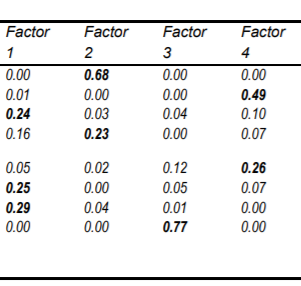

In [325]:
vari_max.style.highlight_max(color = 'lightgreen', axis = 1)

,Factors 1,Factors 2,Factors 3
cols,,,
gdp_g,0.002513,0.002010,0.000180
gdp_pc_g,0.000087,0.000613,0.001311
Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,0.020067,0.053754,0.011009
Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,0.001420,0.012336,0.001211
pol_gen,0.029104,0.119055,0.014269
exl_gen,0.092068,0.039680,0.003591
exl_eco,0.134776,0.008739,0.000131
exl_geo,0.138202,0.005003,0.000252
exl_pol,0.099057,0.013547,0.001539


Following the approach in the paper, the highest factor loading for each indicator is selected as the weighting in each intermediate. For example, the third intermediate is formed by gdp growth and gdp per capita growth 


In [326]:
scaled_df.rename(columns={0:'gdp_g', 1:'gdp_pc_g',
       2:'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       3:'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       4:'pol_gen', 5:'exl_gen', 6:'exl_eco', 7:'exl_geo',8: 'exl_pol',9: 'exl_soc',
       10:'labour_share', 11:'suffrage_f', 12:'domestic_movement', 13:'slave', 14:'suffrage',
       15:'v2xeg_eqaccess'},inplace=True)

In [327]:
scaled_df

,gdp_g,gdp_pc_g,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,pol_gen,exl_gen,exl_eco,exl_geo,exl_pol,exl_soc,labour_share,suffrage_f,domestic_movement,slave,suffrage,v2xeg_eqaccess
0,-0.218264,-0.668485,-0.487855,-0.292554,-1.741134,-1.482757,-1.859317,-2.312332,-1.693680,-2.158850,-4.520442,0.223916,-3.597221,-1.036018,0.223920,-1.624841
1,0.742537,1.299324,0.505510,-1.198619,-0.470131,0.142318,0.237969,0.813269,-0.068167,0.440036,1.010963,0.223916,0.294096,-0.444866,0.223920,0.142130
2,1.705126,0.620784,-2.510063,-1.652942,-3.213484,-1.251252,-0.190129,0.037834,-1.039694,-1.607449,0.929592,-4.693894,-2.735613,-2.970698,-4.696914,-2.250934
3,-1.166290,-1.068674,-0.345946,0.676126,0.630985,1.013866,0.379359,0.705901,1.115056,0.975220,0.132005,0.223916,0.879765,0.495603,0.223920,0.986196
4,0.483546,1.034408,-0.700719,-1.384163,-0.413502,-0.166356,-0.296171,0.276429,0.026340,1.076580,0.483154,0.223916,0.829082,0.586963,0.223920,-0.664833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,0.773553,0.896522,0.434555,0.699145,0.096157,-0.002941,0.127999,-0.518889,-0.741054,0.156226,-0.299712,0.223916,0.012525,-0.654456,0.223920,-0.015552
2540,-0.256345,-0.507806,-0.736196,-1.652942,-0.765860,-0.397861,0.124071,-0.435380,0.903361,0.780607,0.952638,0.223916,-0.139524,0.549344,0.223920,1.190256
2541,-0.777557,-0.745708,0.966715,2.109962,0.643569,-0.406940,-0.378649,-0.614327,-0.068167,-0.662768,-0.089027,0.223916,0.598193,-0.203031,0.223920,0.452858
2542,0.023392,-0.340789,0.434555,-0.071653,0.033236,-0.229906,-0.382576,-0.705789,-1.962079,-0.857380,-0.485705,0.223916,-0.308467,0.355876,0.223920,0.137493


##Aggregting the intermediate composites

In [328]:
load[17:18]

,Factors 1,Factors 2,Factors 3
cols,,,
prop_var_explained,0.416582,0.36656,0.216858


In [332]:
#first intermediate	
scaled_df['first']= 0.002513*scaled_df['gdp_g']  + 0.092068 *scaled_df['exl_gen'] + 0.134776	*scaled_df['exl_eco'] + 0.138202*scaled_df['exl_geo'] + 0.099057 *scaled_df['exl_pol']+ 0.120653*scaled_df['exl_soc']
#second intermediate
scaled_df['second']=0.0537548*scaled_df['Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX'] + 0.012336	*scaled_df['Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS']+ 0.000170*scaled_df['labour_share']+ 0.097847 *scaled_df['domestic_movement']+ 0.086165*scaled_df['slave']+ 		0.059264	*scaled_df['v2xeg_eqaccess']                      	
#third intermediate
scaled_df['third']= 0.001311*scaled_df['gdp_pc_g'] + 0.280691*scaled_df['suffrage_f']+ 0.280711*scaled_df['suffrage']
#perform aggregation using the prop of variance explained by each factor
scaled_df['index']= scaled_df['first']* 0.416582 + scaled_df['second']*	0.36656 + scaled_df['third']*0.216858

In [333]:
full.reset_index(inplace=True)

In [334]:
check=pd.merge(full, scaled_df['index'], left_index=True, right_index=True)

In [335]:
check

,index_x,Country Name,Country Code,Continent,Year,gdp_g,gdp_pc_g,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,pol_gen,exl_gen,exl_eco,exl_geo,exl_pol,exl_soc,labour_share,suffrage_f,domestic_movement,slave,suffrage,v2xeg_eqaccess,index_y
0,2,Angola,AGO,Africa,2000,0.030546,-0.002680,0.62500,0.154545,0.484,0.369,0.163,0.069,0.214,0.127,0.372400,1.0,0.138,0.531,1.0,0.303,-0.654202
1,3,Albania,ALB,Europe,2000,0.069500,0.076339,0.80000,0.051613,0.686,0.727,0.697,0.855,0.644,0.768,0.922612,1.0,0.829,0.641,1.0,0.684,0.117542
2,5,United Arab Emirates,ARE,Asia,2000,0.108527,0.049092,0.26875,0.000000,0.250,0.420,0.588,0.660,0.387,0.263,0.914518,0.0,0.291,0.171,0.0,0.168,-1.047583
3,6,Argentina,ARG,South America,2000,-0.007890,-0.018749,0.65000,0.264591,0.861,0.919,0.733,0.828,0.957,0.900,0.835182,1.0,0.933,0.816,1.0,0.866,0.286472
4,7,Armenia,ARM,Asia,2000,0.059000,0.065701,0.58750,0.030534,0.695,0.659,0.561,0.720,0.669,0.925,0.870111,1.0,0.924,0.833,1.0,0.510,0.089961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,4001,Vietnam,VNM,Asia,2018,0.070758,0.060164,0.78750,0.267206,0.776,0.695,0.669,0.520,0.466,0.698,0.792239,1.0,0.779,0.602,1.0,0.650,-0.090649
2535,4002,Vanuatu,VUT,Oceania,2018,0.029002,0.003773,0.58125,0.000000,0.639,0.608,0.668,0.541,0.901,0.852,0.916811,1.0,0.752,0.826,1.0,0.910,-0.251395
2536,4006,South Africa,ZAF,Africa,2018,0.007871,-0.005781,0.88125,0.427481,0.863,0.606,0.540,0.496,0.644,0.496,0.813196,1.0,0.883,0.686,1.0,0.751,0.063562
2537,4007,Zambia,ZMB,Africa,2018,0.040344,0.010479,0.78750,0.179641,0.766,0.645,0.539,0.473,0.143,0.448,0.773738,1.0,0.722,0.790,1.0,0.683,0.395942


In [336]:
scaled_df

,gdp_g,gdp_pc_g,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,pol_gen,exl_gen,exl_eco,exl_geo,exl_pol,exl_soc,labour_share,suffrage_f,domestic_movement,slave,suffrage,v2xeg_eqaccess,first,second,third,index
0,-0.218264,-0.668485,-0.487855,-0.292554,-1.741134,-1.482757,-1.859317,-2.312332,-1.693680,-2.158850,-4.520442,0.223916,-3.597221,-1.036018,0.223920,-1.624841,-1.135466,-0.568142,0.124832,-0.654202
1,0.742537,1.299324,0.505510,-1.198619,-0.470131,0.142318,0.237969,0.813269,-0.068167,0.440036,1.010963,0.223916,0.294096,-0.444866,0.223920,0.142130,0.205776,0.011427,0.127411,0.117542
2,1.705126,0.620784,-2.510063,-1.652942,-3.213484,-1.251252,-0.190129,0.037834,-1.039694,-1.607449,0.929592,-4.693894,-2.735613,-2.970698,-4.696914,-2.250934,-0.428244,-0.812202,-2.635195,-1.047583
3,-1.166290,-1.068674,-0.345946,0.676126,0.630985,1.013866,0.379359,0.705901,1.115056,0.975220,0.132005,0.223916,0.879765,0.495603,0.223920,0.986196,0.467216,0.176999,0.124307,0.286472
4,0.483546,1.034408,-0.700719,-1.384163,-0.413502,-0.166356,-0.296171,0.276429,0.026340,1.076580,0.483154,0.223916,0.829082,0.586963,0.223920,-0.664833,0.116687,0.037638,0.127064,0.089961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,0.773553,0.896522,0.434555,0.699145,0.096157,-0.002941,0.127999,-0.518889,-0.741054,0.156226,-0.299712,0.223916,0.012525,-0.654456,0.223920,-0.015552,-0.107344,-0.024154,0.126883,-0.026056
2540,-0.256345,-0.507806,-0.736196,-1.652942,-0.765860,-0.397861,0.124071,-0.435380,0.903361,0.780607,0.952638,0.223916,-0.139524,0.549344,0.223920,1.190256,0.102944,0.044419,0.125042,0.086283
2541,-0.777557,-0.745708,0.966715,2.109962,0.643569,-0.406940,-0.378649,-0.614327,-0.068167,-0.662768,-0.089027,0.223916,0.598193,-0.203031,0.223920,0.452858,-0.262071,0.145854,0.124730,-0.028661
2542,0.023392,-0.340789,0.434555,-0.071653,0.033236,-0.229906,-0.382576,-0.705789,-1.962079,-0.857380,-0.485705,0.223916,-0.308467,0.355876,0.223920,0.137493,-0.468015,0.031023,0.125261,-0.156431


In [337]:
# Assign ranking
check['Rank'] = check['index_y'].rank(ascending = False)
check = check.sort_values(by = 'Rank').reset_index()


In [338]:
check.describe()

,index,index_x,Year,gdp_g,gdp_pc_g,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,pol_gen,exl_gen,exl_eco,exl_geo,exl_pol,exl_soc,labour_share,suffrage_f,domestic_movement,slave,suffrage,v2xeg_eqaccess,index_y,Rank
count,2539.00000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000
mean,1269.00000,2054.952343,2009.256794,0.039477,0.024255,0.710895,0.187484,0.760730,0.696175,0.637113,0.651355,0.662291,0.659719,0.821713,0.954379,0.776838,0.723612,0.954406,0.653346,0.000113,1270.000000
std,733.09049,1140.695447,5.395346,0.040529,0.040128,0.176293,0.113523,0.159116,0.220236,0.254421,0.251004,0.264780,0.246869,0.098991,0.203573,0.177774,0.186249,0.203448,0.215877,0.351381,733.090489
min,0.00000,2.000000,2000.000000,-0.301451,-0.313331,0.237500,0.000000,0.105000,0.060000,0.042000,0.052000,0.067000,0.066000,0.112994,0.000000,0.042000,0.026000,0.000000,0.070000,-1.233402,1.000000
25%,634.50000,1089.500000,2005.000000,0.019553,0.005768,0.618750,0.101075,0.675000,0.556000,0.439000,0.485000,0.456000,0.483500,0.785624,1.000000,0.725000,0.644000,1.000000,0.510000,-0.203810,635.500000
50%,1269.00000,2063.000000,2009.000000,0.039130,0.024141,0.731250,0.171429,0.798000,0.712000,0.663000,0.688000,0.702000,0.694000,0.830624,1.000000,0.836000,0.755000,1.000000,0.693000,0.013364,1270.000000
75%,1903.50000,3043.500000,2014.000000,0.060137,0.043835,0.843750,0.257606,0.881500,0.909000,0.864000,0.901000,0.916000,0.882000,0.873296,1.000000,0.901000,0.861000,1.000000,0.830000,0.298243,1904.500000
max,2538.00000,4008.000000,2018.000000,0.344662,0.329971,1.000000,0.637500,0.969000,0.987000,0.991000,0.969000,0.992000,0.989000,1.326813,1.000000,0.958000,0.975000,1.000000,0.976000,0.483322,2539.000000


In [339]:
check.index_y=round((check.index_y +1.233402),2)

In [340]:
check.describe()

,index,index_x,Year,gdp_g,gdp_pc_g,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,pol_gen,exl_gen,exl_eco,exl_geo,exl_pol,exl_soc,labour_share,suffrage_f,domestic_movement,slave,suffrage,v2xeg_eqaccess,index_y,Rank
count,2539.00000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000,2539.000000
mean,1269.00000,2054.952343,2009.256794,0.039477,0.024255,0.710895,0.187484,0.760730,0.696175,0.637113,0.651355,0.662291,0.659719,0.821713,0.954379,0.776838,0.723612,0.954406,0.653346,1.233430,1270.000000
std,733.09049,1140.695447,5.395346,0.040529,0.040128,0.176293,0.113523,0.159116,0.220236,0.254421,0.251004,0.264780,0.246869,0.098991,0.203573,0.177774,0.186249,0.203448,0.215877,0.351475,733.090489
min,0.00000,2.000000,2000.000000,-0.301451,-0.313331,0.237500,0.000000,0.105000,0.060000,0.042000,0.052000,0.067000,0.066000,0.112994,0.000000,0.042000,0.026000,0.000000,0.070000,0.000000,1.000000
25%,634.50000,1089.500000,2005.000000,0.019553,0.005768,0.618750,0.101075,0.675000,0.556000,0.439000,0.485000,0.456000,0.483500,0.785624,1.000000,0.725000,0.644000,1.000000,0.510000,1.030000,635.500000
50%,1269.00000,2063.000000,2009.000000,0.039130,0.024141,0.731250,0.171429,0.798000,0.712000,0.663000,0.688000,0.702000,0.694000,0.830624,1.000000,0.836000,0.755000,1.000000,0.693000,1.250000,1270.000000
75%,1903.50000,3043.500000,2014.000000,0.060137,0.043835,0.843750,0.257606,0.881500,0.909000,0.864000,0.901000,0.916000,0.882000,0.873296,1.000000,0.901000,0.861000,1.000000,0.830000,1.530000,1904.500000
max,2538.00000,4008.000000,2018.000000,0.344662,0.329971,1.000000,0.637500,0.969000,0.987000,0.991000,0.969000,0.992000,0.989000,1.326813,1.000000,0.958000,0.975000,1.000000,0.976000,1.720000,2539.000000


In [341]:
final_index=check[['Country Name', 'Country Code', 'Continent', 'Year',
       'gdp_g', 'gdp_pc_g',
       'Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX',
       'Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS',
       'pol_gen', 'exl_gen', 'exl_eco', 'exl_geo', 'exl_pol', 'exl_soc',
       'labour_share', 'suffrage_f', 'domestic_movement', 'slave', 'suffrage',
       'v2xeg_eqaccess', 'index_y', 'Rank']].rename(columns={'index_y':'Composite_index'})

In [342]:
final_index.head(20)

,Country Name,Country Code,Continent,Year,gdp_g,gdp_pc_g,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,pol_gen,exl_gen,exl_eco,exl_geo,exl_pol,exl_soc,labour_share,suffrage_f,domestic_movement,slave,suffrage,v2xeg_eqaccess,Composite_index,Rank
0,Algeria,DZA,Africa,2016,0.032000,0.011046,0.57500,0.316017,0.813,0.638,0.626,0.556,0.588,0.647,0.831211,1.0,0.798,0.702,1.0,0.580,1.72,1.0
1,Dominican Republic,DOM,North America,2015,0.069270,0.057155,0.83750,0.207650,0.827,0.369,0.223,0.258,0.313,0.362,0.911553,1.0,0.814,0.745,1.0,0.581,1.72,2.0
2,Spain,ESP,Europe,2018,0.022888,0.018418,0.97500,0.391429,0.942,0.957,0.934,0.900,0.975,0.953,0.849366,1.0,0.948,0.906,1.0,0.900,1.72,3.0
3,Ecuador,ECU,South America,2017,0.023684,0.005739,0.89375,0.379562,0.865,0.724,0.608,0.704,0.786,0.745,0.789443,1.0,0.857,0.828,1.0,0.768,1.71,4.0
4,Nepal,NPL,Asia,2009,0.045331,0.036895,0.49375,0.331650,0.777,0.678,0.788,0.493,0.610,0.641,0.959903,1.0,0.761,0.759,1.0,0.861,1.71,5.0
5,Nepal,NPL,Asia,2004,0.046826,0.032888,0.46875,0.058537,0.556,0.464,0.659,0.274,0.171,0.386,0.952699,0.0,0.530,0.576,0.0,0.731,1.71,6.0
6,Nepal,NPL,Asia,2005,0.034792,0.021722,0.46875,0.058537,0.571,0.464,0.689,0.279,0.181,0.386,0.955593,0.0,0.542,0.576,0.0,0.731,1.71,7.0
7,Nepal,NPL,Asia,2006,0.033646,0.020870,0.46875,0.058824,0.614,0.467,0.688,0.317,0.298,0.431,0.955852,0.0,0.599,0.587,0.0,0.777,1.71,8.0
8,Pakistan,PAK,Asia,2018,0.058364,0.036810,0.52500,0.202346,0.603,0.747,0.488,0.675,0.769,0.699,0.923136,1.0,0.428,0.594,1.0,0.363,1.71,9.0
9,Eswatini,SWZ,Africa,2012,0.053913,0.046828,0.43750,0.136364,0.467,0.585,0.512,0.566,0.221,0.578,0.782846,1.0,0.390,0.115,1.0,0.201,1.71,10.0


In [344]:
final_index.shape

(2539, 22)

In [343]:
final_index.tail(20)

,Country Name,Country Code,Continent,Year,gdp_g,gdp_pc_g,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,pol_gen,exl_gen,exl_eco,exl_geo,exl_pol,exl_soc,labour_share,suffrage_f,domestic_movement,slave,suffrage,v2xeg_eqaccess,Composite_index,Rank
2519,Senegal,SEN,Africa,2009,0.027521,-8.200000e-07,0.63750,0.226667,0.816,0.665,0.724,0.769,0.754,0.780,0.891485,1.0,0.891,0.694,1.0,0.790,0.18,2520.0
2520,Liberia,LBR,Africa,2002,0.037630,1.334264e-02,0.66250,0.078125,0.525,0.442,0.284,0.151,0.292,0.308,0.666904,0.0,0.536,0.339,0.0,0.661,0.17,2521.0
2521,Senegal,SEN,Africa,2006,0.023308,-2.957549e-03,0.63750,0.191667,0.810,0.665,0.724,0.769,0.754,0.780,0.895664,1.0,0.891,0.694,1.0,0.790,0.17,2522.0
2522,Senegal,SEN,Africa,2007,0.028271,1.453263e-03,0.63750,0.220000,0.816,0.665,0.724,0.769,0.754,0.780,0.908263,1.0,0.891,0.694,1.0,0.790,0.17,2523.0
2523,Liberia,LBR,Africa,2003,-0.301451,-3.133308e-01,0.66250,0.078125,0.525,0.442,0.284,0.151,0.292,0.308,0.573178,0.0,0.536,0.339,0.0,0.661,0.16,2524.0
2524,Senegal,SEN,Africa,2005,0.043102,1.676298e-02,0.63750,0.191667,0.810,0.665,0.724,0.772,0.754,0.780,0.884161,1.0,0.891,0.694,1.0,0.790,0.16,2525.0
2525,Senegal,SEN,Africa,2004,0.046433,2.043050e-02,0.63750,0.191667,0.802,0.665,0.724,0.772,0.754,0.780,0.890836,1.0,0.891,0.694,1.0,0.790,0.10,2526.0
2526,Saudi Arabia,SAU,Asia,2003,0.112421,8.015644e-02,0.23750,0.000000,0.105,0.060,0.436,0.474,0.861,0.302,0.795406,0.0,0.160,0.209,0.0,0.098,0.10,2527.0
2527,Eritrea,ERI,Africa,2000,-0.031420,-5.465864e-02,0.66250,0.146667,0.381,0.280,0.485,0.374,0.097,0.233,0.873209,0.0,0.145,0.105,0.0,0.492,0.06,2528.0
2528,Eritrea,ERI,Africa,2001,0.087554,4.985964e-02,0.66250,0.146667,0.334,0.280,0.485,0.420,0.079,0.233,0.871141,0.0,0.042,0.073,0.0,0.492,0.04,2529.0


uk

In [226]:
uk=check[check['Country Code']=='GBR'].sort_values('Year')

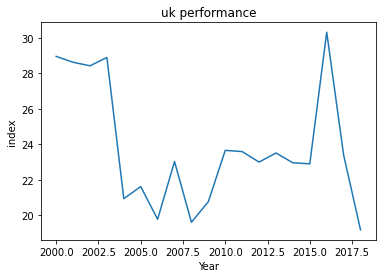

In [227]:

plt.plot(uk.Year,uk.index_y)
plt.title('uk performance')
plt.xlabel('Year')
plt.ylabel('index')
plt.show()